In [1]:
import os, sys
import pandas as pd
import numpy as np
import pickle

from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns

from sklearn.preprocessing import Normalizer
from sklearn.neural_network import BernoulliRBM
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option("display.max_rows",999)
pd.set_option('display.max_columns',999)

In [3]:
def kfoldFunction(variables, yVars, mClassifier, cv = 5, verbose = False, plot = False):
    accuracy = []
    precision = []
    recall = []
    kf = KFold(n_splits = cv)

    for train_index, test_index in kf.split(variables):
        xTrain, xTest = variables.iloc[train_index], variables.iloc[test_index]
        yTrain, yTest = yVars.iloc[train_index], yVars.iloc[test_index]

        mClassifier = mClassifier.fit(xTrain, yTrain)
        mPredict = mClassifier.predict(xTest)

        if verbose == True:
            print('Accuracy:', accuracy_score(yTest, mPredict), '\n')
            print(classification_report(yTest, mPredict))
            print(pd.DataFrame(confusion_matrix(yTest, mPredict)), '\n\n\n')
        accuracy.append(accuracy_score(yTest, mPredict))
        precision.append(precision_score(yTest, mPredict, average='weighted'))
        recall.append(recall_score(yTest, mPredict, average='weighted'))
    
    metrics = pd.DataFrame([accuracy,precision,recall]).T
    metrics.columns = ['accuracy','precision','recall']
    if plot == True:
        plt.figure()
        plt.title('Accuracy: Mean {} | SD {}'.format(round(np.average(accuracy),4), round(np.std(accuracy),4)))

        sns.boxplot(metrics)
    return(metrics)

# Load Data

In [4]:
mnistImages = pd.read_csv('train.csv')

In [5]:
images = mnistImages.ix[:,1:]
labels = mnistImages.ix[:,0]

In [6]:
images.shape

(42000, 784)

In [7]:
labels.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


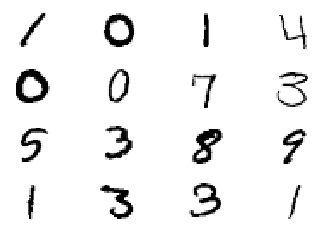

In [8]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks(())
    plt.yticks(())
    plt.imshow(images.iloc[i].reshape(28,28))

# Prep Data

In [9]:
iTrain, iTest, lTrain, lTest = train_test_split(images, labels, train_size = 0.5)

In [10]:
norm = Normalizer()
norm.fit(iTrain)

iTrain = norm.transform(iTrain)
iTest = norm.transform(iTest)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


## RBM

In [11]:
rbm1 = BernoulliRBM(n_components=784, batch_size=1000, n_iter=5, learning_rate=0.05, random_state=0, verbose=True)
rbm2 = BernoulliRBM(n_components=392, batch_size=1000, n_iter=10, learning_rate=0.01, random_state=0, verbose=True)
rbm3 = BernoulliRBM(n_components=157, batch_size=1000, n_iter=50, learning_rate=0.01, random_state=0, verbose=True)
rbm4 = BernoulliRBM(n_components=79, batch_size=1000, n_iter=50, learning_rate=0.01, random_state=0, verbose=True)
rbm5 = BernoulliRBM(n_components=16, batch_size=1000, n_iter=80, learning_rate=0.05, random_state=0, verbose=True)

In [16]:
rbm5.fit(iTrain)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -281.29, time = 1.53s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -176.04, time = 1.98s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -108.31, time = 1.94s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -62.83, time = 1.95s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -39.25, time = 1.91s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -27.73, time = 1.91s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -22.28, time = 1.97s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -19.46, time = 1.96s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -17.99, time = 1.92s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -17.12, time = 2.15s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -16.52, time = 1.97s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -16.11, time = 1.94s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -15.78, time = 1.97s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -15.54, time = 1.92s
[BernoulliRBM] Iteration 1

BernoulliRBM(batch_size=1000, learning_rate=0.05, n_components=16, n_iter=80,
       random_state=0, verbose=True)

In [17]:
rbm4.fit(iTrain)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -354.24, time = 2.68s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -292.17, time = 3.72s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -249.12, time = 3.81s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -221.63, time = 3.66s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -208.47, time = 3.77s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -201.25, time = 3.68s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -161.14, time = 3.80s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -131.66, time = 3.72s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -105.68, time = 3.74s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -77.09, time = 3.69s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -54.67, time = 3.72s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -40.39, time = 3.71s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -30.84, time = 3.69s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -24.72, time = 3.66s
[BernoulliRBM] Itera

BernoulliRBM(batch_size=1000, learning_rate=0.01, n_components=79, n_iter=50,
       random_state=0, verbose=True)

In [18]:
rbm3.fit(iTrain)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -256.42, time = 4.39s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -203.04, time = 6.18s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -182.81, time = 6.20s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -188.30, time = 6.23s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -168.39, time = 6.23s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -113.34, time = 6.15s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -86.12, time = 6.21s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -51.36, time = 6.18s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -33.13, time = 6.27s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -22.62, time = 6.32s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -18.14, time = 6.14s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -15.95, time = 6.54s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -15.01, time = 6.32s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -14.52, time = 6.16s
[BernoulliRBM] Iteratio

BernoulliRBM(batch_size=1000, learning_rate=0.01, n_components=157, n_iter=50,
       random_state=0, verbose=True)

In [19]:
rbm2.fit(iTrain)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -94.49, time = 8.76s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -91.78, time = 12.85s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -117.42, time = 12.90s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -52.09, time = 12.82s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -29.76, time = 12.70s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -17.74, time = 12.75s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -14.32, time = 12.75s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -13.39, time = 12.76s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -13.35, time = 12.72s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -13.45, time = 12.82s


BernoulliRBM(batch_size=1000, learning_rate=0.01, n_components=392, n_iter=10,
       random_state=0, verbose=True)

In [11]:
rbm1.fit(iTrain)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -13.07, time = 16.64s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -12.82, time = 23.79s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -12.62, time = 24.16s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -12.63, time = 25.19s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -12.55, time = 24.99s


BernoulliRBM(batch_size=1000, learning_rate=0.05, n_components=784, n_iter=5,
       random_state=0, verbose=True)

# Parameter Tuning

In [11]:
rbm = BernoulliRBM(n_components=784, batch_size=1000, n_iter=5, learning_rate=0.05, random_state=0, verbose=True)
images = rbm.fit_transform(iTrain)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -15.37, time = 10.18s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -15.02, time = 14.72s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -14.68, time = 14.73s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -14.74, time = 14.71s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -14.63, time = 14.70s


In [15]:
# SVM
param_grid = {
    'C':[1,100,1000,6000]
}

classifier = SVC(kernel='linear')
gs = GridSearchCV(classifier, param_grid, n_jobs=-1)
gs = gs.fit(images, lTrain)
print('best score: ', gs.best_score_)
print(gs.best_estimator_)

best score:  0.93280952381
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [14]:
# Logistic Regression
param_grid = {
    'C':[1,100,1000,6000]
}

classifier = LogisticRegression()
gs2 = GridSearchCV(classifier, param_grid, n_jobs=-1)
gs2 = gs2.fit(images, lTrain)
print('best score: ', gs2.best_score_)
print(gs2.best_estimator_)

best score:  0.909238095238
LogisticRegression(C=6000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# Modeling

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.927 

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       681
          1       0.96      0.98      0.97       811
          2       0.91      0.92      0.92       686
          3       0.90      0.90      0.90       746
          4       0.91      0.94      0.93       686
          5       0.87      0.87      0.87       635
          6       0.95      0.96      0.95       658
          7       0.96      0.93      0.94       728
          8       0.91      0.89      0.90       665
          9       0.93      0.91      0.92       704

avg / total       0.93      0.93      0.93      7000

     0    1    2    3    4    5    6    7    8    9
0  661    0    4    1    3    6    5    0    1    0
1    1  792    4    1    1    3    0    2    6    1
2    9    0  631    4    8    8   10    6    9    1
3    3    5   14  669    1   28    3    5   14    4
4    2    3    5    0  644    2    3    2    1   24
5    5    6    8   32    4  552

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


,accuracy,precision,recall
0,0.927000,0.926979,0.927000
1,0.937286,0.937470,0.937286
2,0.935714,0.935605,0.935714


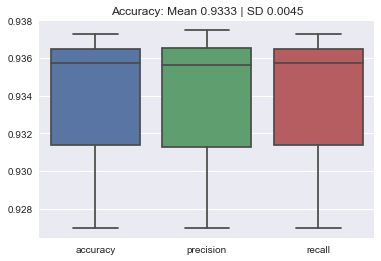

In [27]:
images = pd.DataFrame(images)
lTrain = pd.DataFrame(lTrain)
kfoldFunction(images, lTrain, SVC(kernel='linear', C=1000), verbose=True, cv=5, plot=True)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.902 

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       681
          1       0.95      0.97      0.96       811
          2       0.90      0.87      0.88       686
          3       0.87      0.86      0.87       746
          4       0.88      0.91      0.89       686
          5       0.85      0.82      0.83       635
          6       0.91      0.95      0.93       658
          7       0.94      0.91      0.93       728
          8       0.87      0.86      0.86       665
          9       0.88      0.88      0.88       704

avg / total       0.90      0.90      0.90      7000

     0    1    2    3    4    5    6    7    8    9
0  662    0    4    0    2    4    8    0    1    0
1    0  790    4    4    1    4    0    0    8    0
2    9    4  596    8   14    6   12   15   20    2
3    3    5   19  645    2   31    8    6   18    9
4    0    5    8    2  625    1    8    2    7   28
5    7    2    4   41   14  520

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


,accuracy,precision,recall
0,0.902000,0.901672,0.902000
1,0.912286,0.912123,0.912286
2,0.914143,0.913816,0.914143


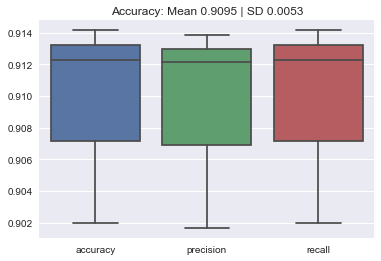

In [26]:
kfoldFunction(images, lTrain, LogisticRegression(C=6000), verbose=True, cv=5, plot=True)

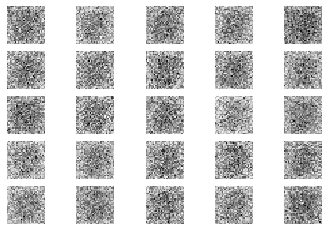

In [22]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks(())
    plt.yticks(())
    plt.imshow(rbm.components_[i].reshape(28,28))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


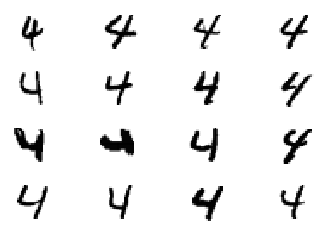

In [204]:
for i in range(len(misclassifications)):
    plt.subplot(4, 4, i + 1)
    plt.xticks(())
    plt.yticks(())
    plt.imshow(misclassifications.iloc[i].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

## Multiple Layer RBM

In [162]:
# Params
c = 6000

n_components = int(len(iTrain[0]))
n_iter = 2
learning_rate = 0.1


logistic = LogisticRegression(C=c)
rbm = BernoulliRBM(n_components=n_components, batch_size=200, n_iter=n_iter, learning_rate=learning_rate, random_state=1234, verbose=True)
rbm2 = BernoulliRBM(n_components=int(len(iTrain[0])/2), batch_size=200, n_iter=2, learning_rate=0.4, random_state=1234, verbose=True)
classifier = Pipeline(steps=[('rbm', rbm2), ('logistic', logistic)])

In [163]:
rbm.fit(iTrain, lTrain)
layer2Components = rbm.transform(iTrain)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -14.57, time = 18.12s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -14.52, time = 25.57s


In [164]:
classifier.fit(layer2Components, lTrain)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -537.75, time = 9.93s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -537.70, time = 14.23s


Pipeline(steps=[('rbm', BernoulliRBM(batch_size=200, learning_rate=0.4, n_components=392, n_iter=2,
       random_state=1234, verbose=True)), ('logistic', LogisticRegression(C=6000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [165]:
rbmLayer1Pred = rbm.transform(iTest)
rbmPred = classifier.predict(rbmLayer1Pred)

In [166]:
print(classification_report(lTest, rbmPred))
pd.DataFrame(confusion_matrix(lTest, rbmPred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       804
          1       0.11      1.00      0.20       948
          2       0.00      0.00      0.00       807
          3       0.00      0.00      0.00       894
          4       0.00      0.00      0.00       850
          5       0.00      0.00      0.00       802
          6       0.00      0.00      0.00       808
          7       0.00      0.00      0.00       847
          8       0.00      0.00      0.00       814
          9       0.00      0.00      0.00       826

avg / total       0.01      0.11      0.02      8400



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0,1,2,3,4,5,6,7,8,9
0,0,804,0,0,0,0,0,0,0,0
1,0,948,0,0,0,0,0,0,0,0
2,0,807,0,0,0,0,0,0,0,0
3,0,894,0,0,0,0,0,0,0,0
4,0,850,0,0,0,0,0,0,0,0
5,0,802,0,0,0,0,0,0,0,0
6,0,808,0,0,0,0,0,0,0,0
7,0,847,0,0,0,0,0,0,0,0
8,0,814,0,0,0,0,0,0,0,0
9,0,826,0,0,0,0,0,0,0,0
